In [1]:
# 필요한 패키지 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os
from scipy.optimize import curve_fit

In [2]:
# 경고 안보이기
import warnings
warnings.filterwarnings('ignore', 'ConvergenceWarning')
warnings.filterwarnings('ignore', 'UserWarning')
# 특정 경고 메시지를 억제
warnings.filterwarnings('ignore', category=UserWarning, module='statsmodels')
warnings.filterwarnings('ignore', category=FutureWarning, module='statsmodels')

In [3]:
# 시각화 한글폰트
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows의 맑은 고딕 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [7]:
# Load the CSV file
# 기본 경로 지정
base_path = 'F:/cluster_test_2024/search_results_2024_06-04_combined'
filename = 'df_combined_search_results_uid-year-techfull_only.csv'
# 파일의 전체 경로
file_path = os.path.join(base_path, filename)
df = pd.read_csv(file_path)
# Drop the unnamed column
df = df.drop(columns=['Unnamed: 0'])

In [9]:
# Define the logistic function
def logistic_function(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

In [11]:
# Get unique keys
keys = df['key'].unique()

# Dictionary to store results
results = {}

# Loop through each key and perform logistic curve fitting
for key in keys:
    # Filter the dataframe for the current key and pubyear range
    filtered_df = df[(df['key'] == key) & 
                     (df['pubyear'] >= 2006) & 
                     (df['pubyear'] <= 2023)]
    
    # Group by pubyear and count unique uid
    grouped_df = filtered_df.groupby('pubyear')['uid'].nunique().reset_index()
    grouped_df = grouped_df.rename(columns={'uid': 'unique_uid_count'})
    
    # Extract the pubyear and uid count data
    x_data = grouped_df['pubyear'].values
    y_data = grouped_df['unique_uid_count'].values
    
    # Initial guess for the parameters
    initial_guess = [max(y_data), np.median(x_data), 1, min(y_data)]
    
    try:
        # Perform the curve fitting
        params, _ = curve_fit(logistic_function, x_data, y_data, p0=initial_guess, maxfev=10000)
        
        # Store the results in the dictionary
        results[key] = {
            'x_data': x_data,
            'y_data': y_data,
            'params': params
        }
    except RuntimeError:
        print(f"Optimal parameters not found for key: {key}")

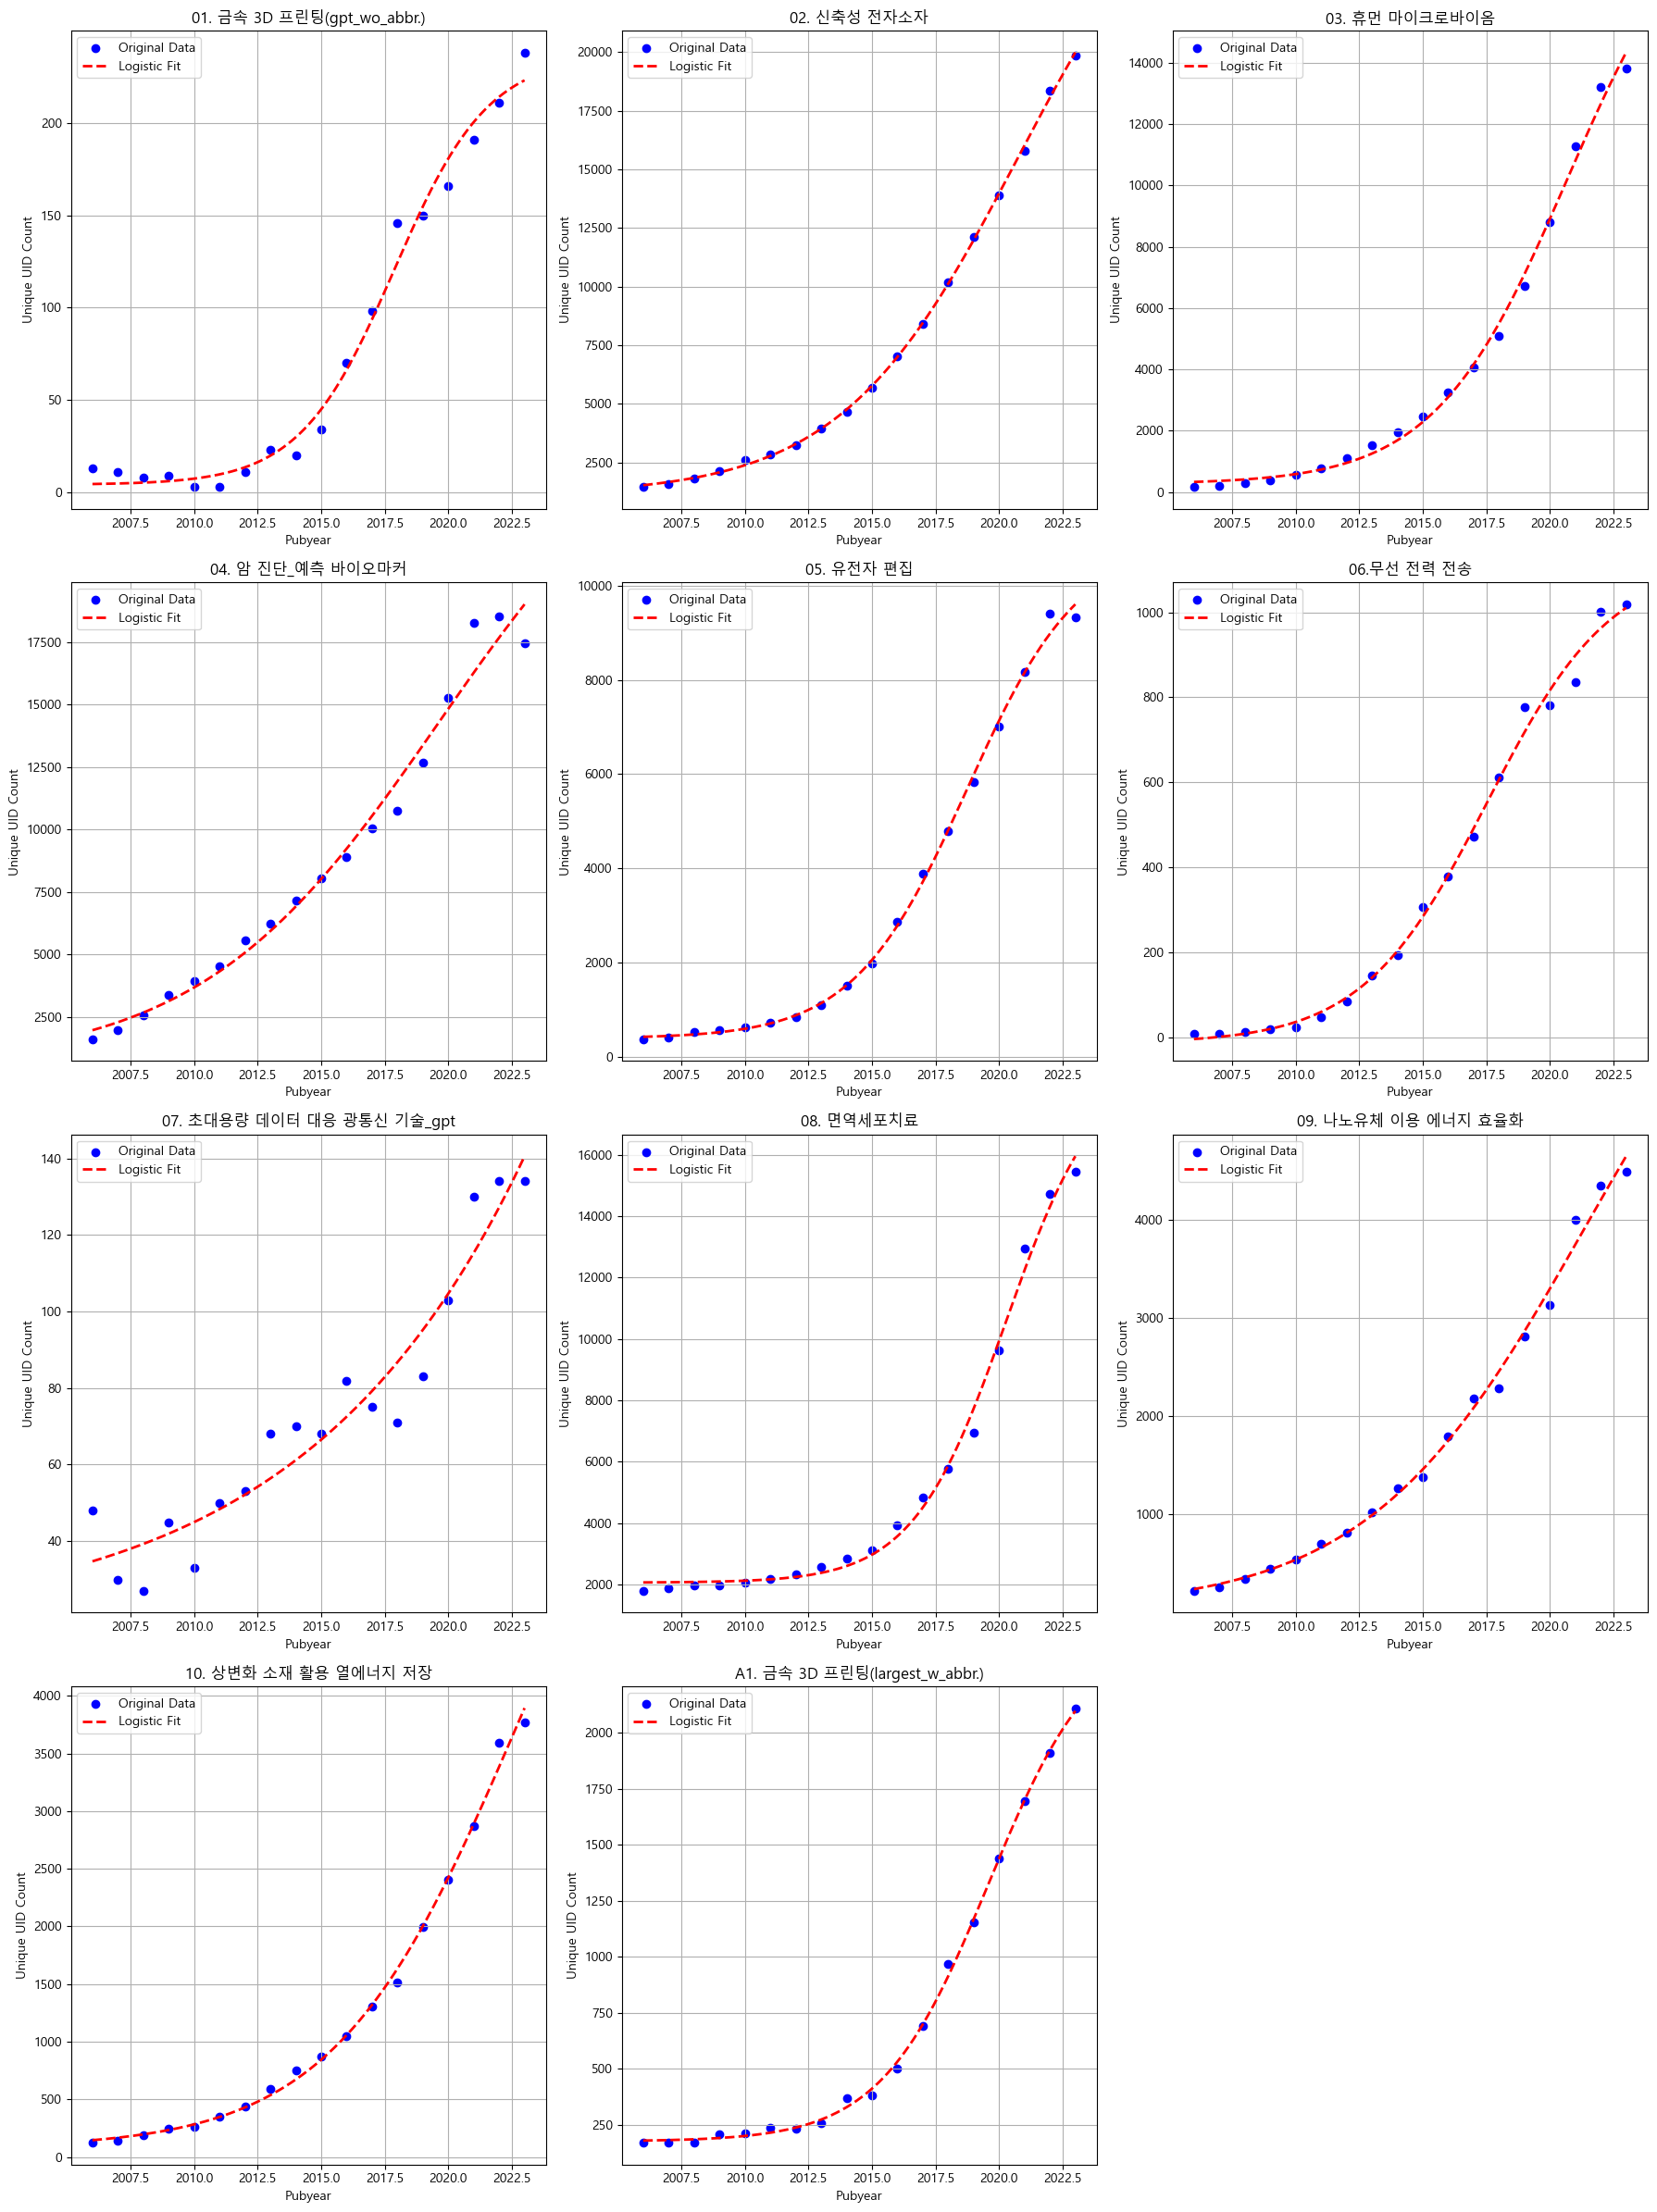

In [19]:
# Plotting the results
num_keys = len(keys)
num_cols = 3
num_rows = (num_keys // num_cols) + (1 if num_keys % num_cols else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
axes = axes.flatten()

x_fit = np.linspace(2006, 2023, 500)

for idx, (key, data) in enumerate(results.items()):
    ax = axes[idx]
    x_data = data['x_data']
    y_data = data['y_data']
    params = data['params']
    y_fit = logistic_function(x_fit, *params)
    
    ax.scatter(x_data, y_data, label='Original Data', color='blue')
    ax.plot(x_fit, y_fit, 'r--', label='Logistic Fit', linewidth=2)
    ax.set_xlabel('Pubyear')
    ax.set_ylabel('Unique UID Count')
    ax.set_title(key)
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

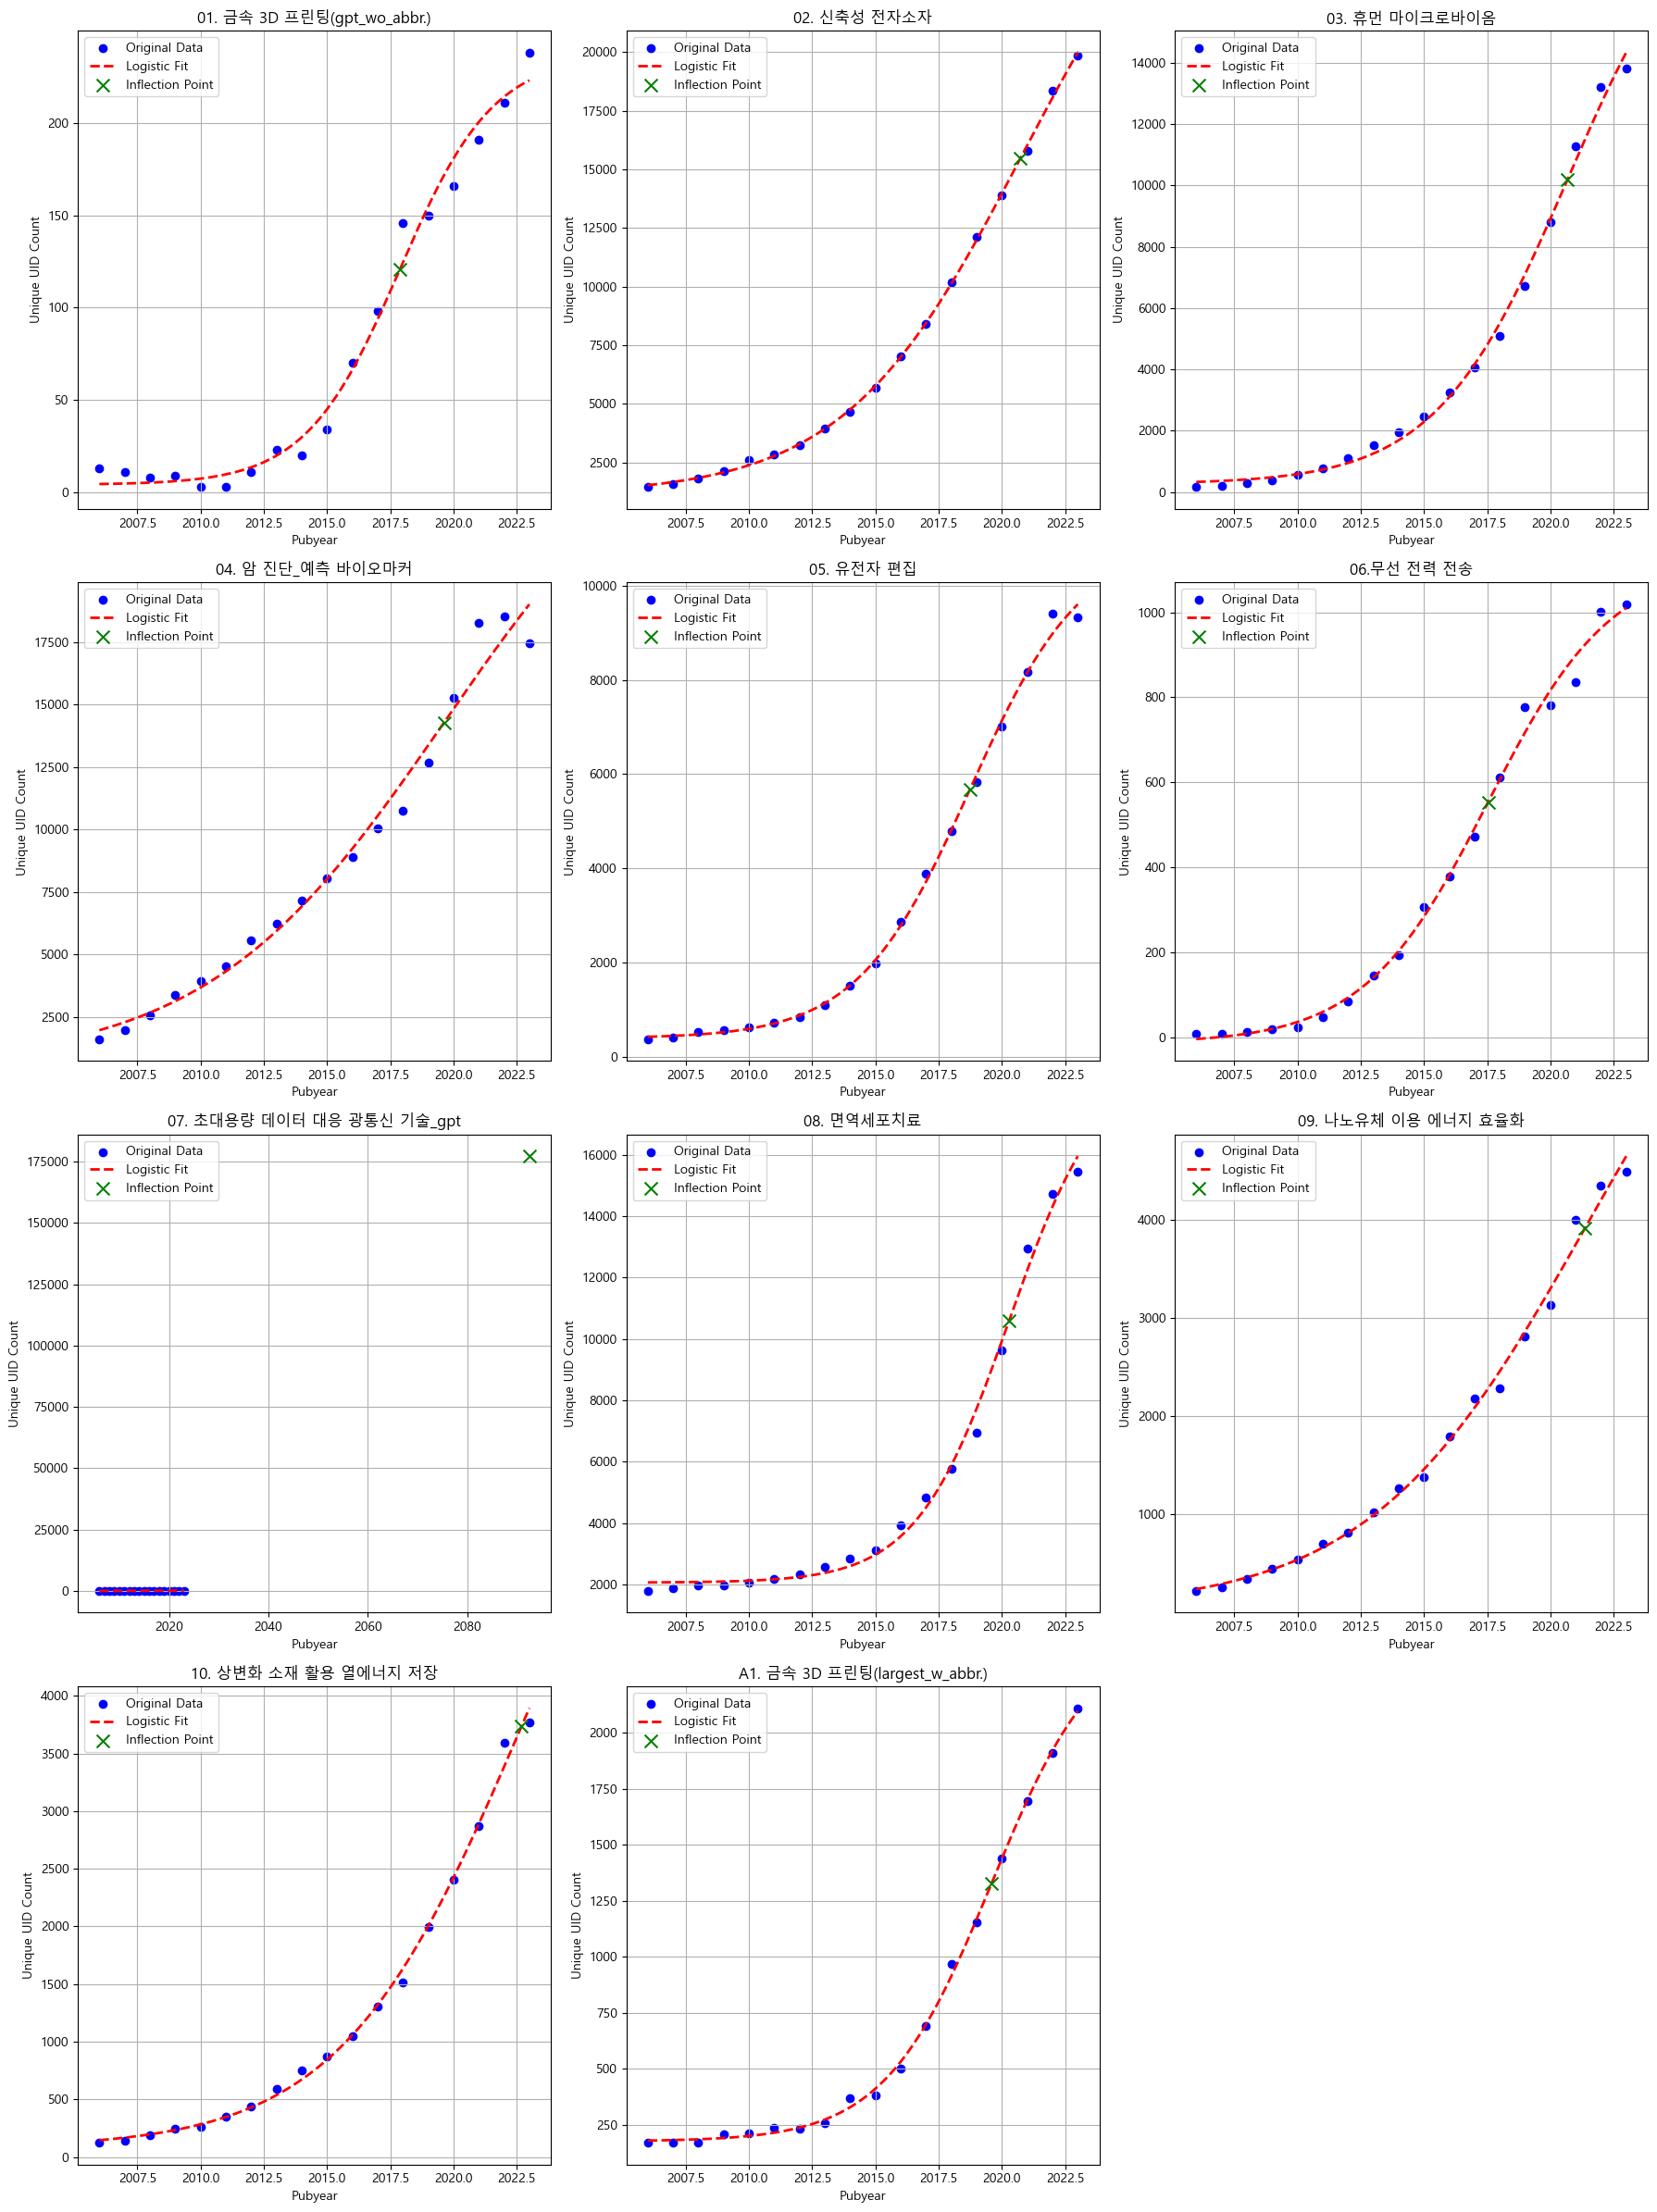

In [22]:
# Plotting the results
num_keys = len(keys)
num_cols = 3
num_rows = (num_keys // num_cols) + (1 if num_keys % num_cols else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
axes = axes.flatten()

x_fit = np.linspace(2006, 2023, 500)

for idx, (key, data) in enumerate(results.items()):
    ax = axes[idx]
    x_data = data['x_data']
    y_data = data['y_data']
    params = data['params']
    y_fit = logistic_function(x_fit, *params)
    
    # Calculate inflection point
    x0 = params[1]
    y0 = logistic_function(x0, *params)

    
    ax.scatter(x_data, y_data, label='Original Data', color='blue')
    ax.plot(x_fit, y_fit, 'r--', label='Logistic Fit', linewidth=2)
    ax.scatter(x0, y0, color='green', s=100, marker='x', zorder=5, label='Inflection Point')
    ax.set_xlabel('Pubyear')
    ax.set_ylabel('Unique UID Count')
    ax.set_title(key)
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

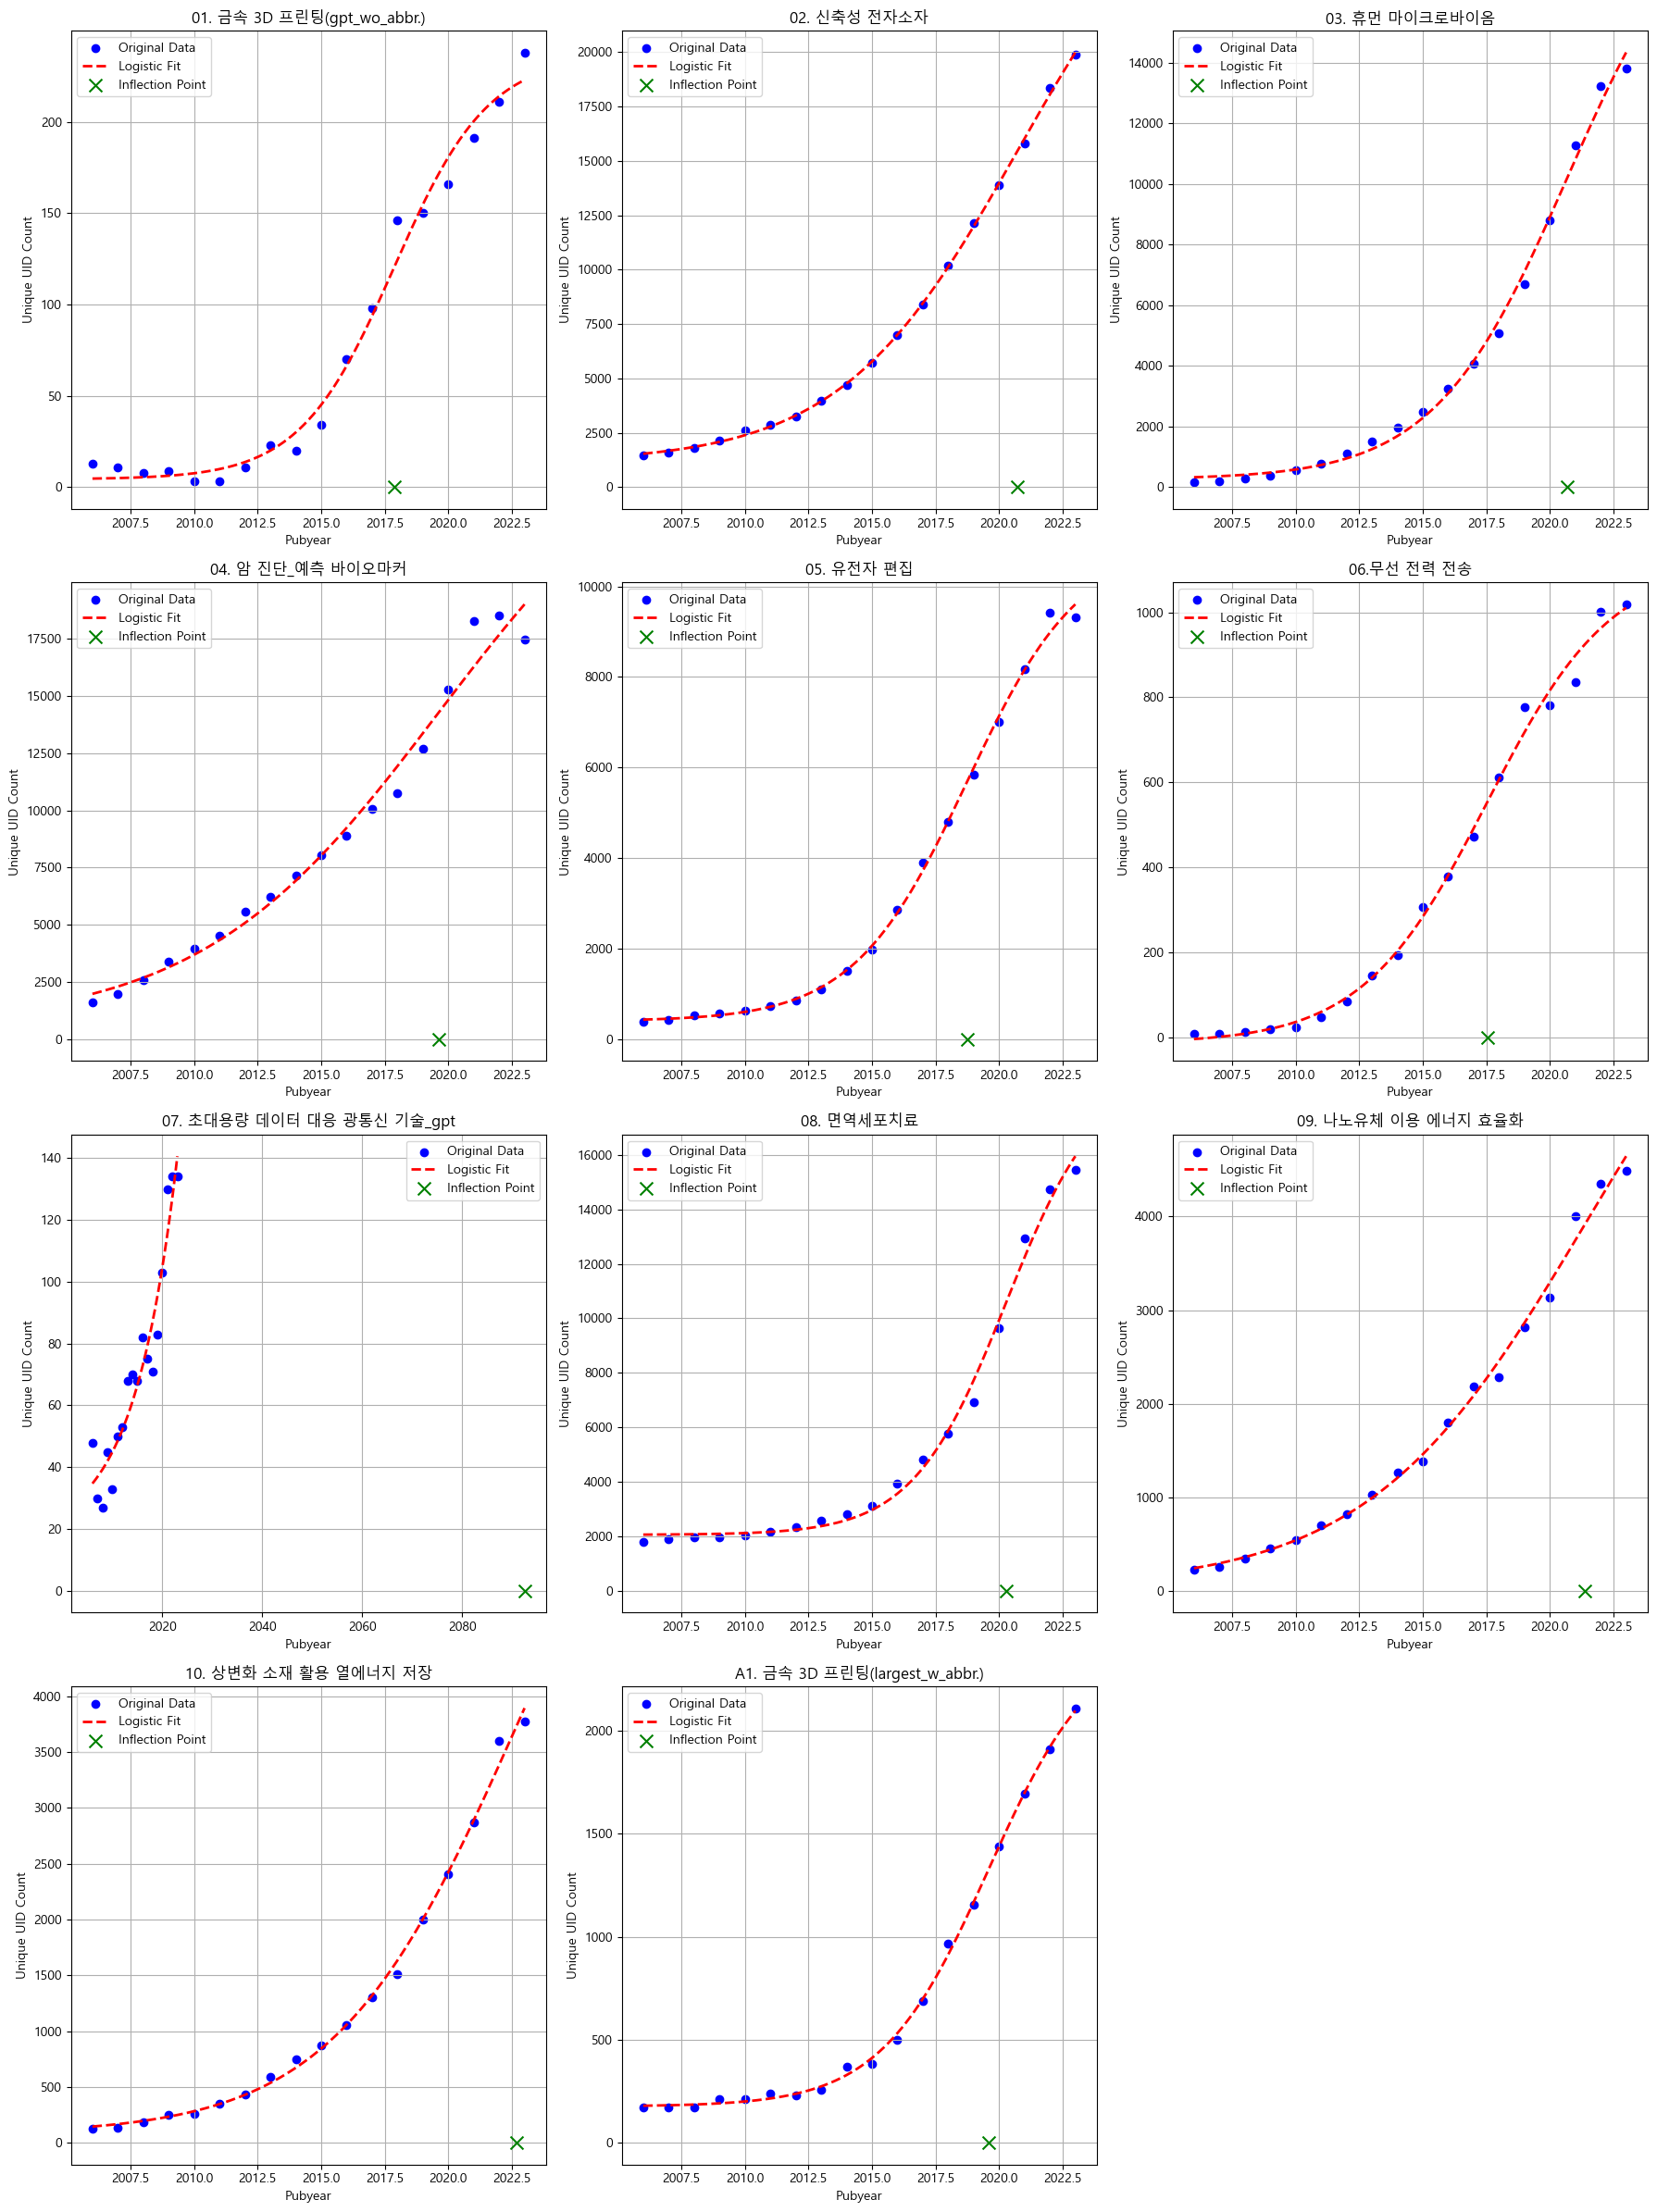

In [29]:
num_keys = len(results)
num_cols = 3
num_rows = (num_keys // num_cols) + (1 if num_keys % num_cols else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
axes = axes.flatten()

x_fit = np.linspace(2006, 2023, 500)

for idx, (key, data) in enumerate(results.items()):
    ax = axes[idx]
    x_data = data['x_data']
    y_data = data['y_data']
    params = data['params']
    y_fit = logistic_function(x_fit, *params)
    
    # Calculate inflection point
    x0 = params[1]
    y0 = logistic_function(x0, *params)
    
    ax.scatter(x_data, y_data, label='Original Data', color='blue')
    ax.plot(x_fit, y_fit, 'r--', label='Logistic Fit', linewidth=2)
    #ax.scatter(x0, y0, color='green', zorder=5, label='Inflection Point')
    ax.scatter(x0, 0, color='green', s=100, marker='x', zorder=5, label='Inflection Point')
    ax.set_xlabel('Pubyear')
    ax.set_ylabel('Unique UID Count')
    ax.set_title(key)
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

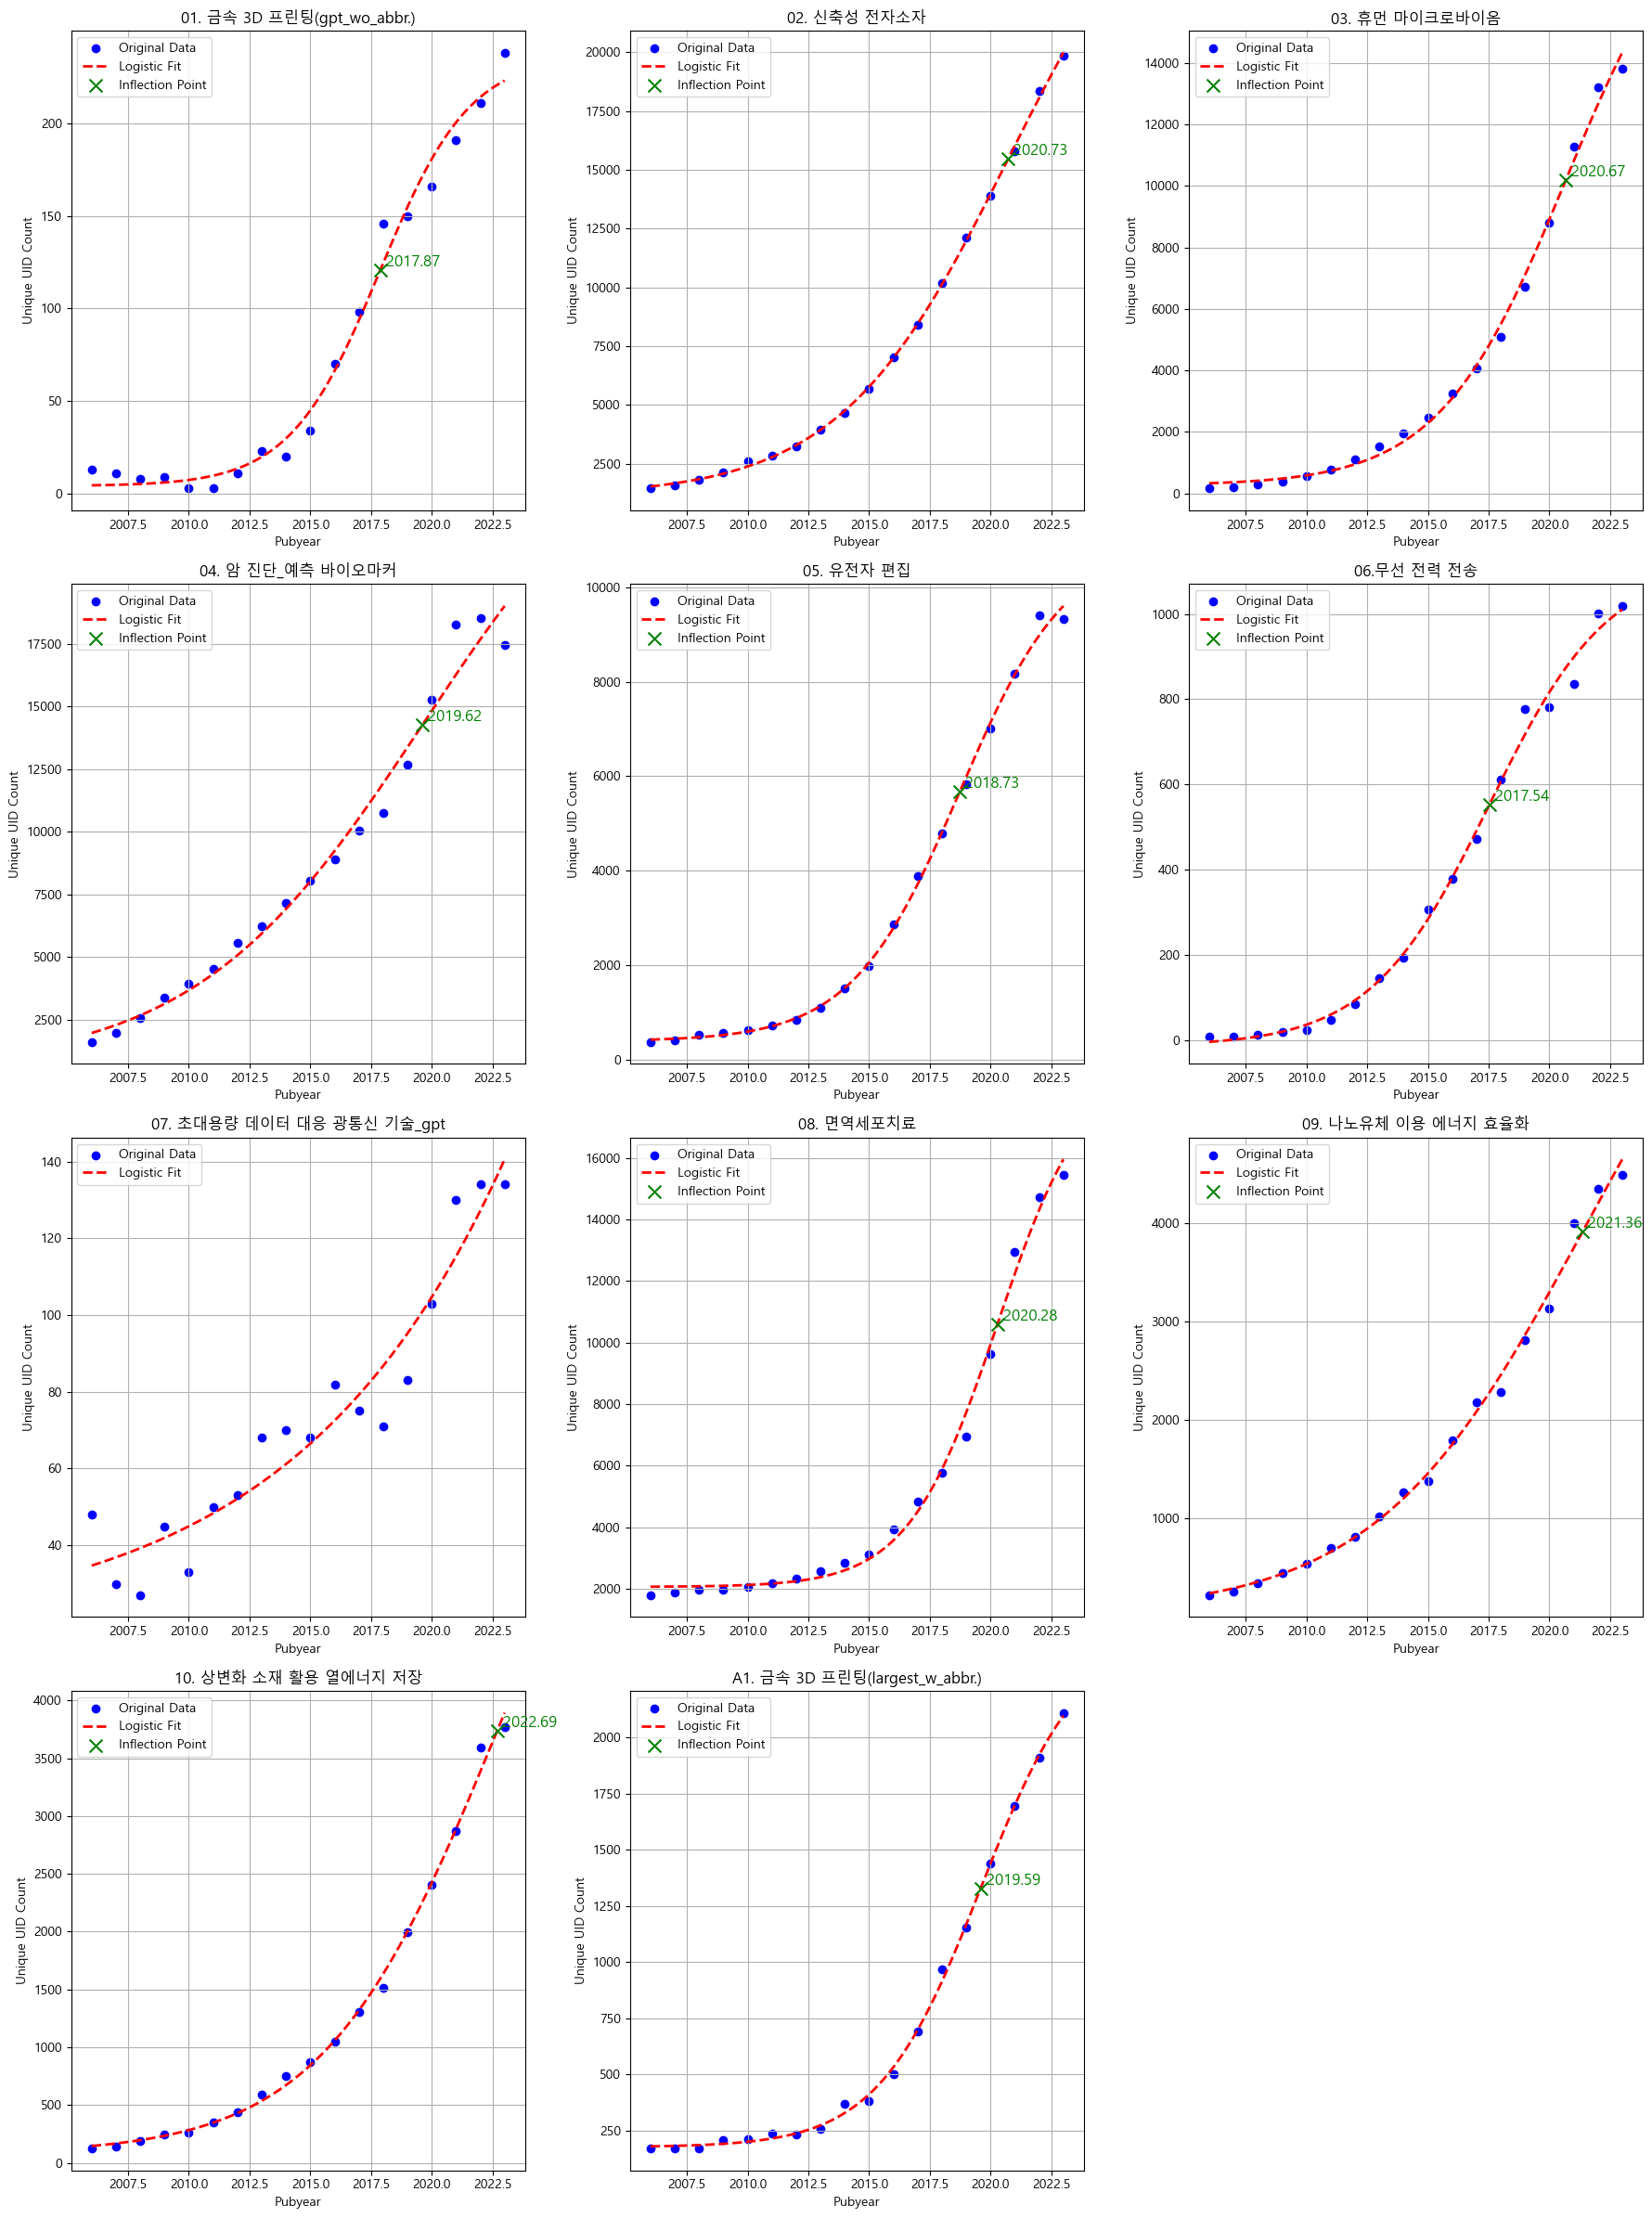

In [30]:
num_keys = len(results)
num_cols = 3
num_rows = (num_keys // num_cols) + (1 if num_keys % num_cols else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
axes = axes.flatten()

x_fit = np.linspace(2006, 2023, 500)

for idx, (key, data) in enumerate(results.items()):
    ax = axes[idx]
    x_data = data['x_data']
    y_data = data['y_data']
    params = data['params']
    y_fit = logistic_function(x_fit, *params)
    
    # Calculate inflection point
    x0 = params[1]
    y0 = logistic_function(x0, *params)
    
    ax.scatter(x_data, y_data, label='Original Data', color='blue')
    ax.plot(x_fit, y_fit, 'r--', label='Logistic Fit', linewidth=2)
    
    # Plot inflection point only if within the x-axis range of original data
    if x0 >= min(x_data) and x0 <= max(x_data):
        ax.scatter(x0, y0, color='green', s=100, marker='x', zorder=5, label='Inflection Point')
        ax.text(x0, y0, f' {x0:.2f}', color='green', fontsize=12, verticalalignment='bottom')
    
    ax.set_xlabel('Pubyear')
    ax.set_ylabel('Unique UID Count')
    ax.set_title(key)
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

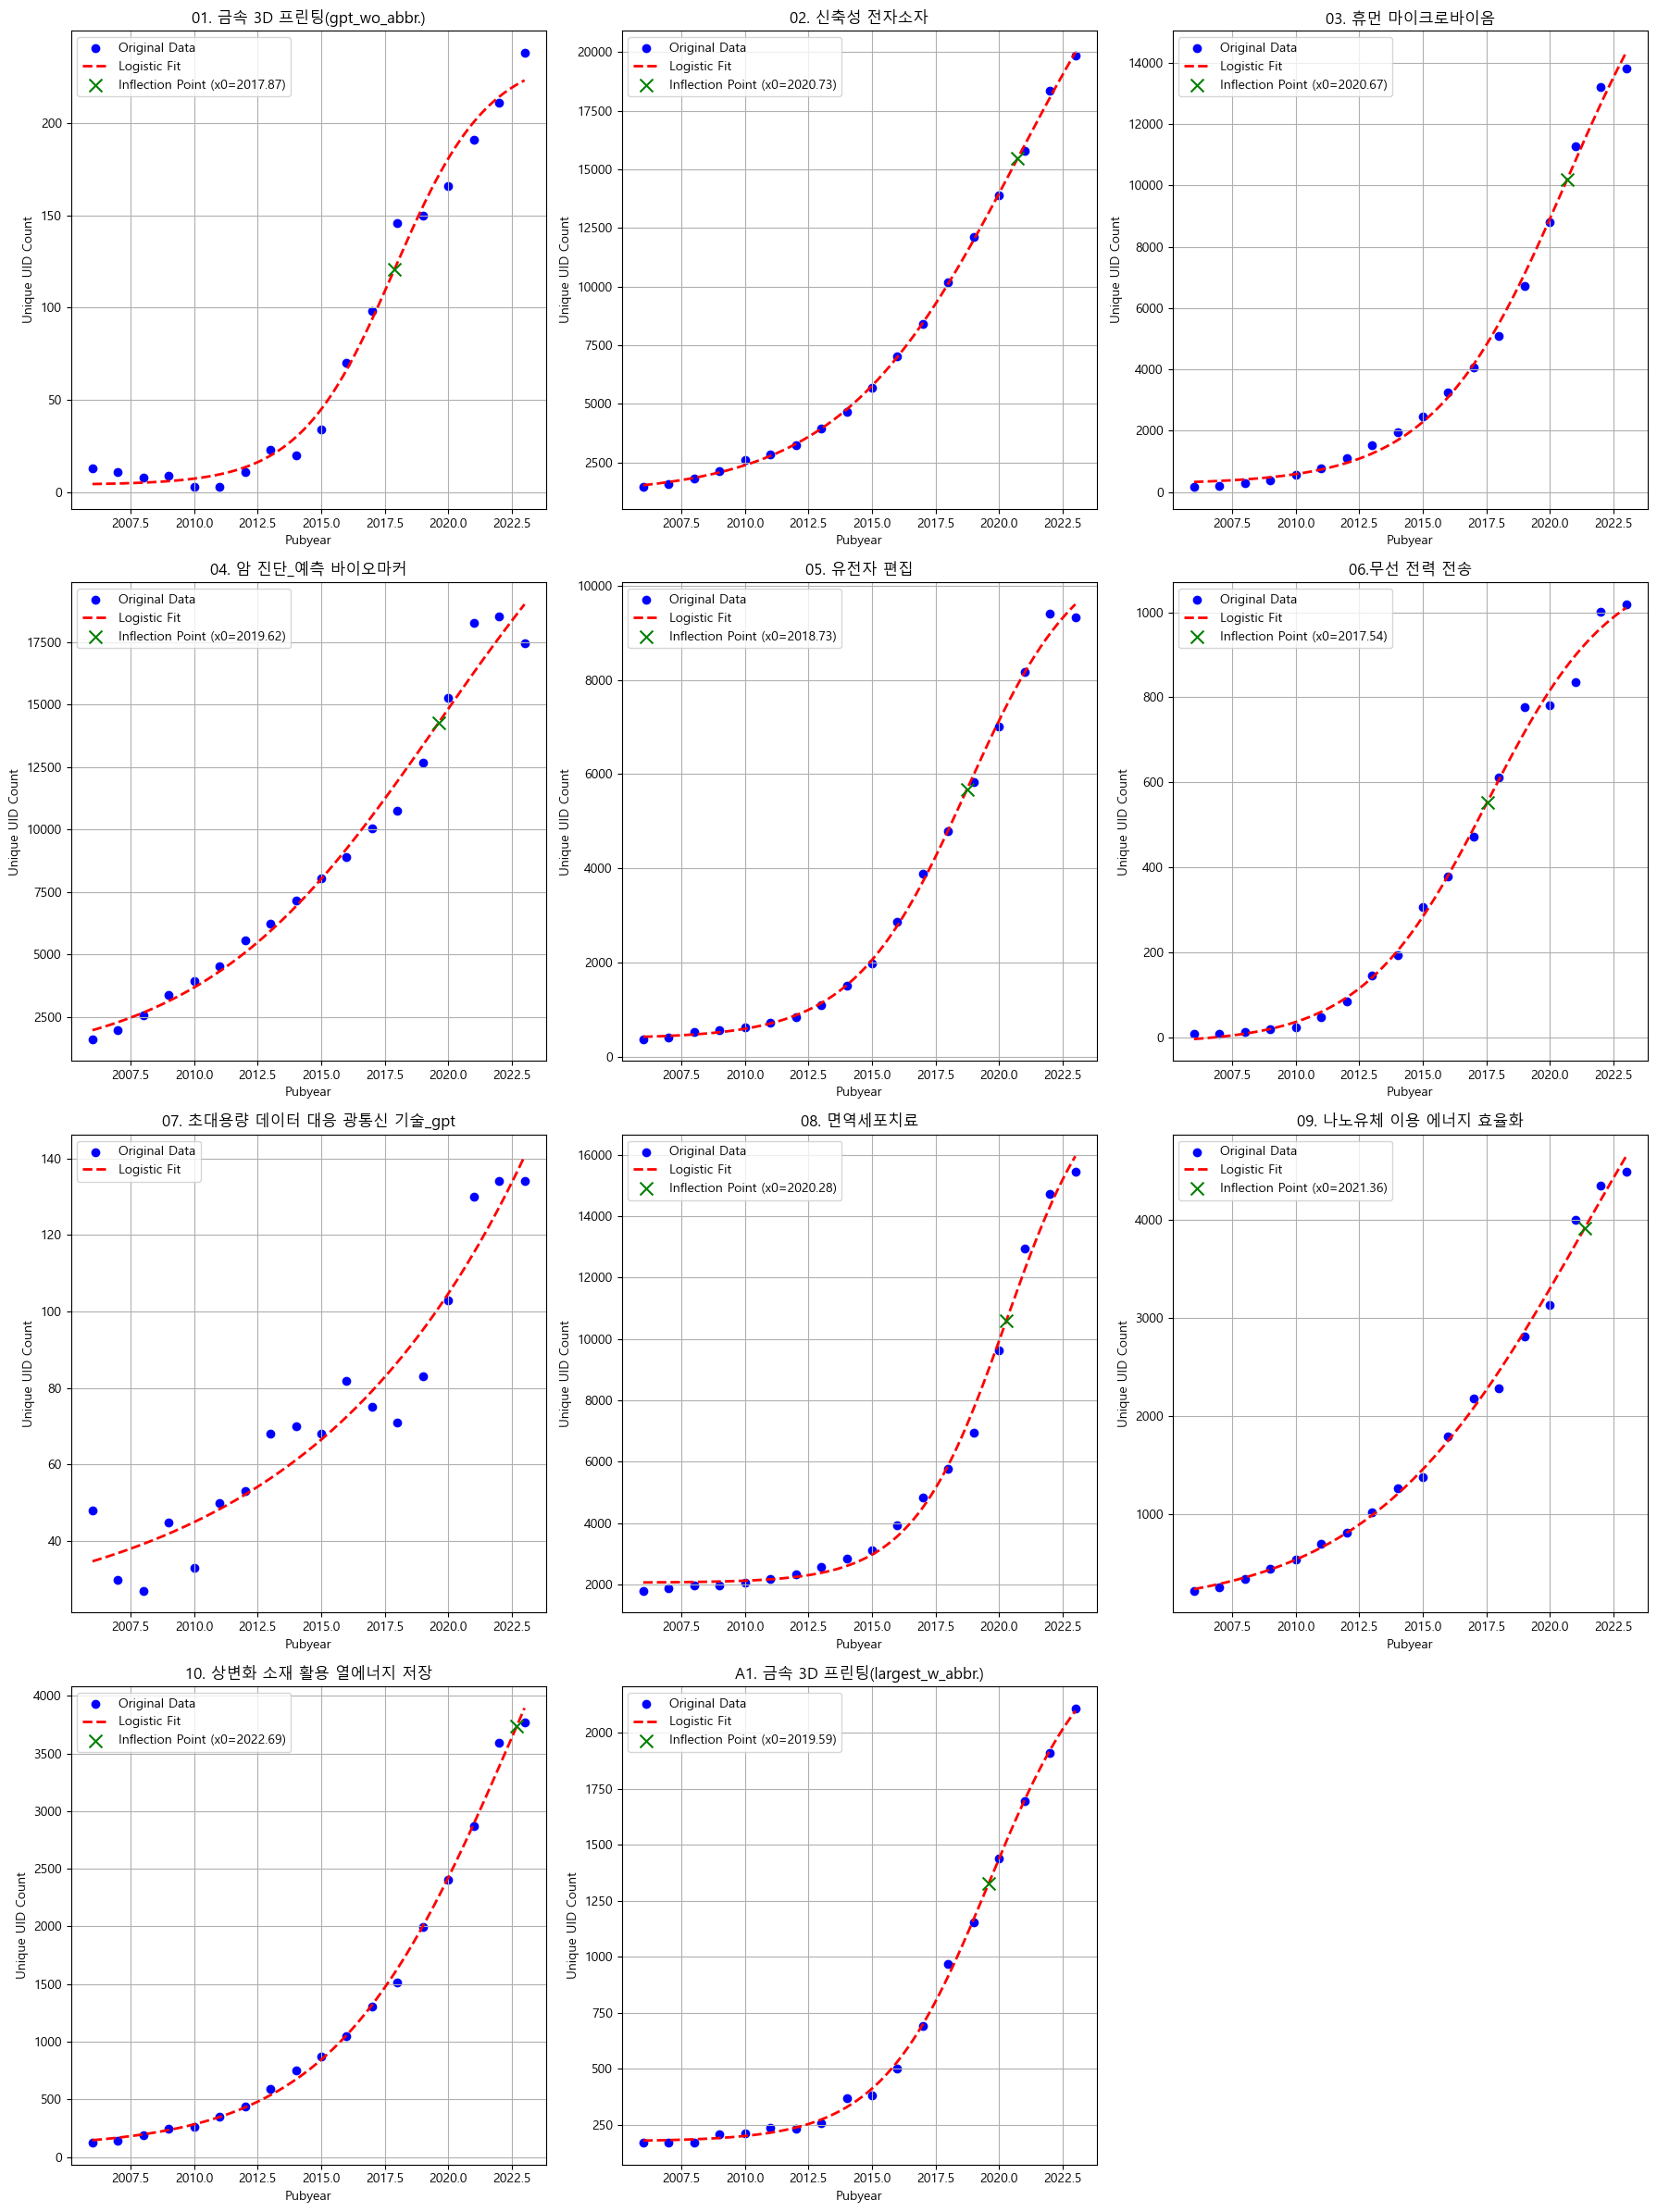

In [37]:
# Plotting the results
num_keys = len(results)
num_cols = 3
num_rows = (num_keys // num_cols) + (1 if num_keys % num_cols else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
axes = axes.flatten()

x_fit = np.linspace(2006, 2023, 500)

for idx, (key, data) in enumerate(results.items()):
    ax = axes[idx]
    x_data = data['x_data']
    y_data = data['y_data']
    params = data['params']
    y_fit = logistic_function(x_fit, *params)
    
    # Calculate inflection point
    x0 = params[1]
    y0 = logistic_function(x0, *params)
    
    ax.scatter(x_data, y_data, label='Original Data', color='blue')
    ax.plot(x_fit, y_fit, 'r--', label='Logistic Fit', linewidth=2)
    
    inflection_point_label = f'Inflection Point (x0={x0:.2f})'
      
    if x0 >= min(x_data) and x0 <= max(x_data):
        ax.scatter(x0, y0, color='green', s=100, marker='x', zorder=5)
        #inflection_point_label += ' - Shown'
    
    ax.set_xlabel('Pubyear')
    ax.set_ylabel('Unique UID Count')
    ax.legend(['Original Data', 'Logistic Fit',inflection_point_label])
    ax.set_title(key)
    ax.grid(True)

# Hide any unused subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

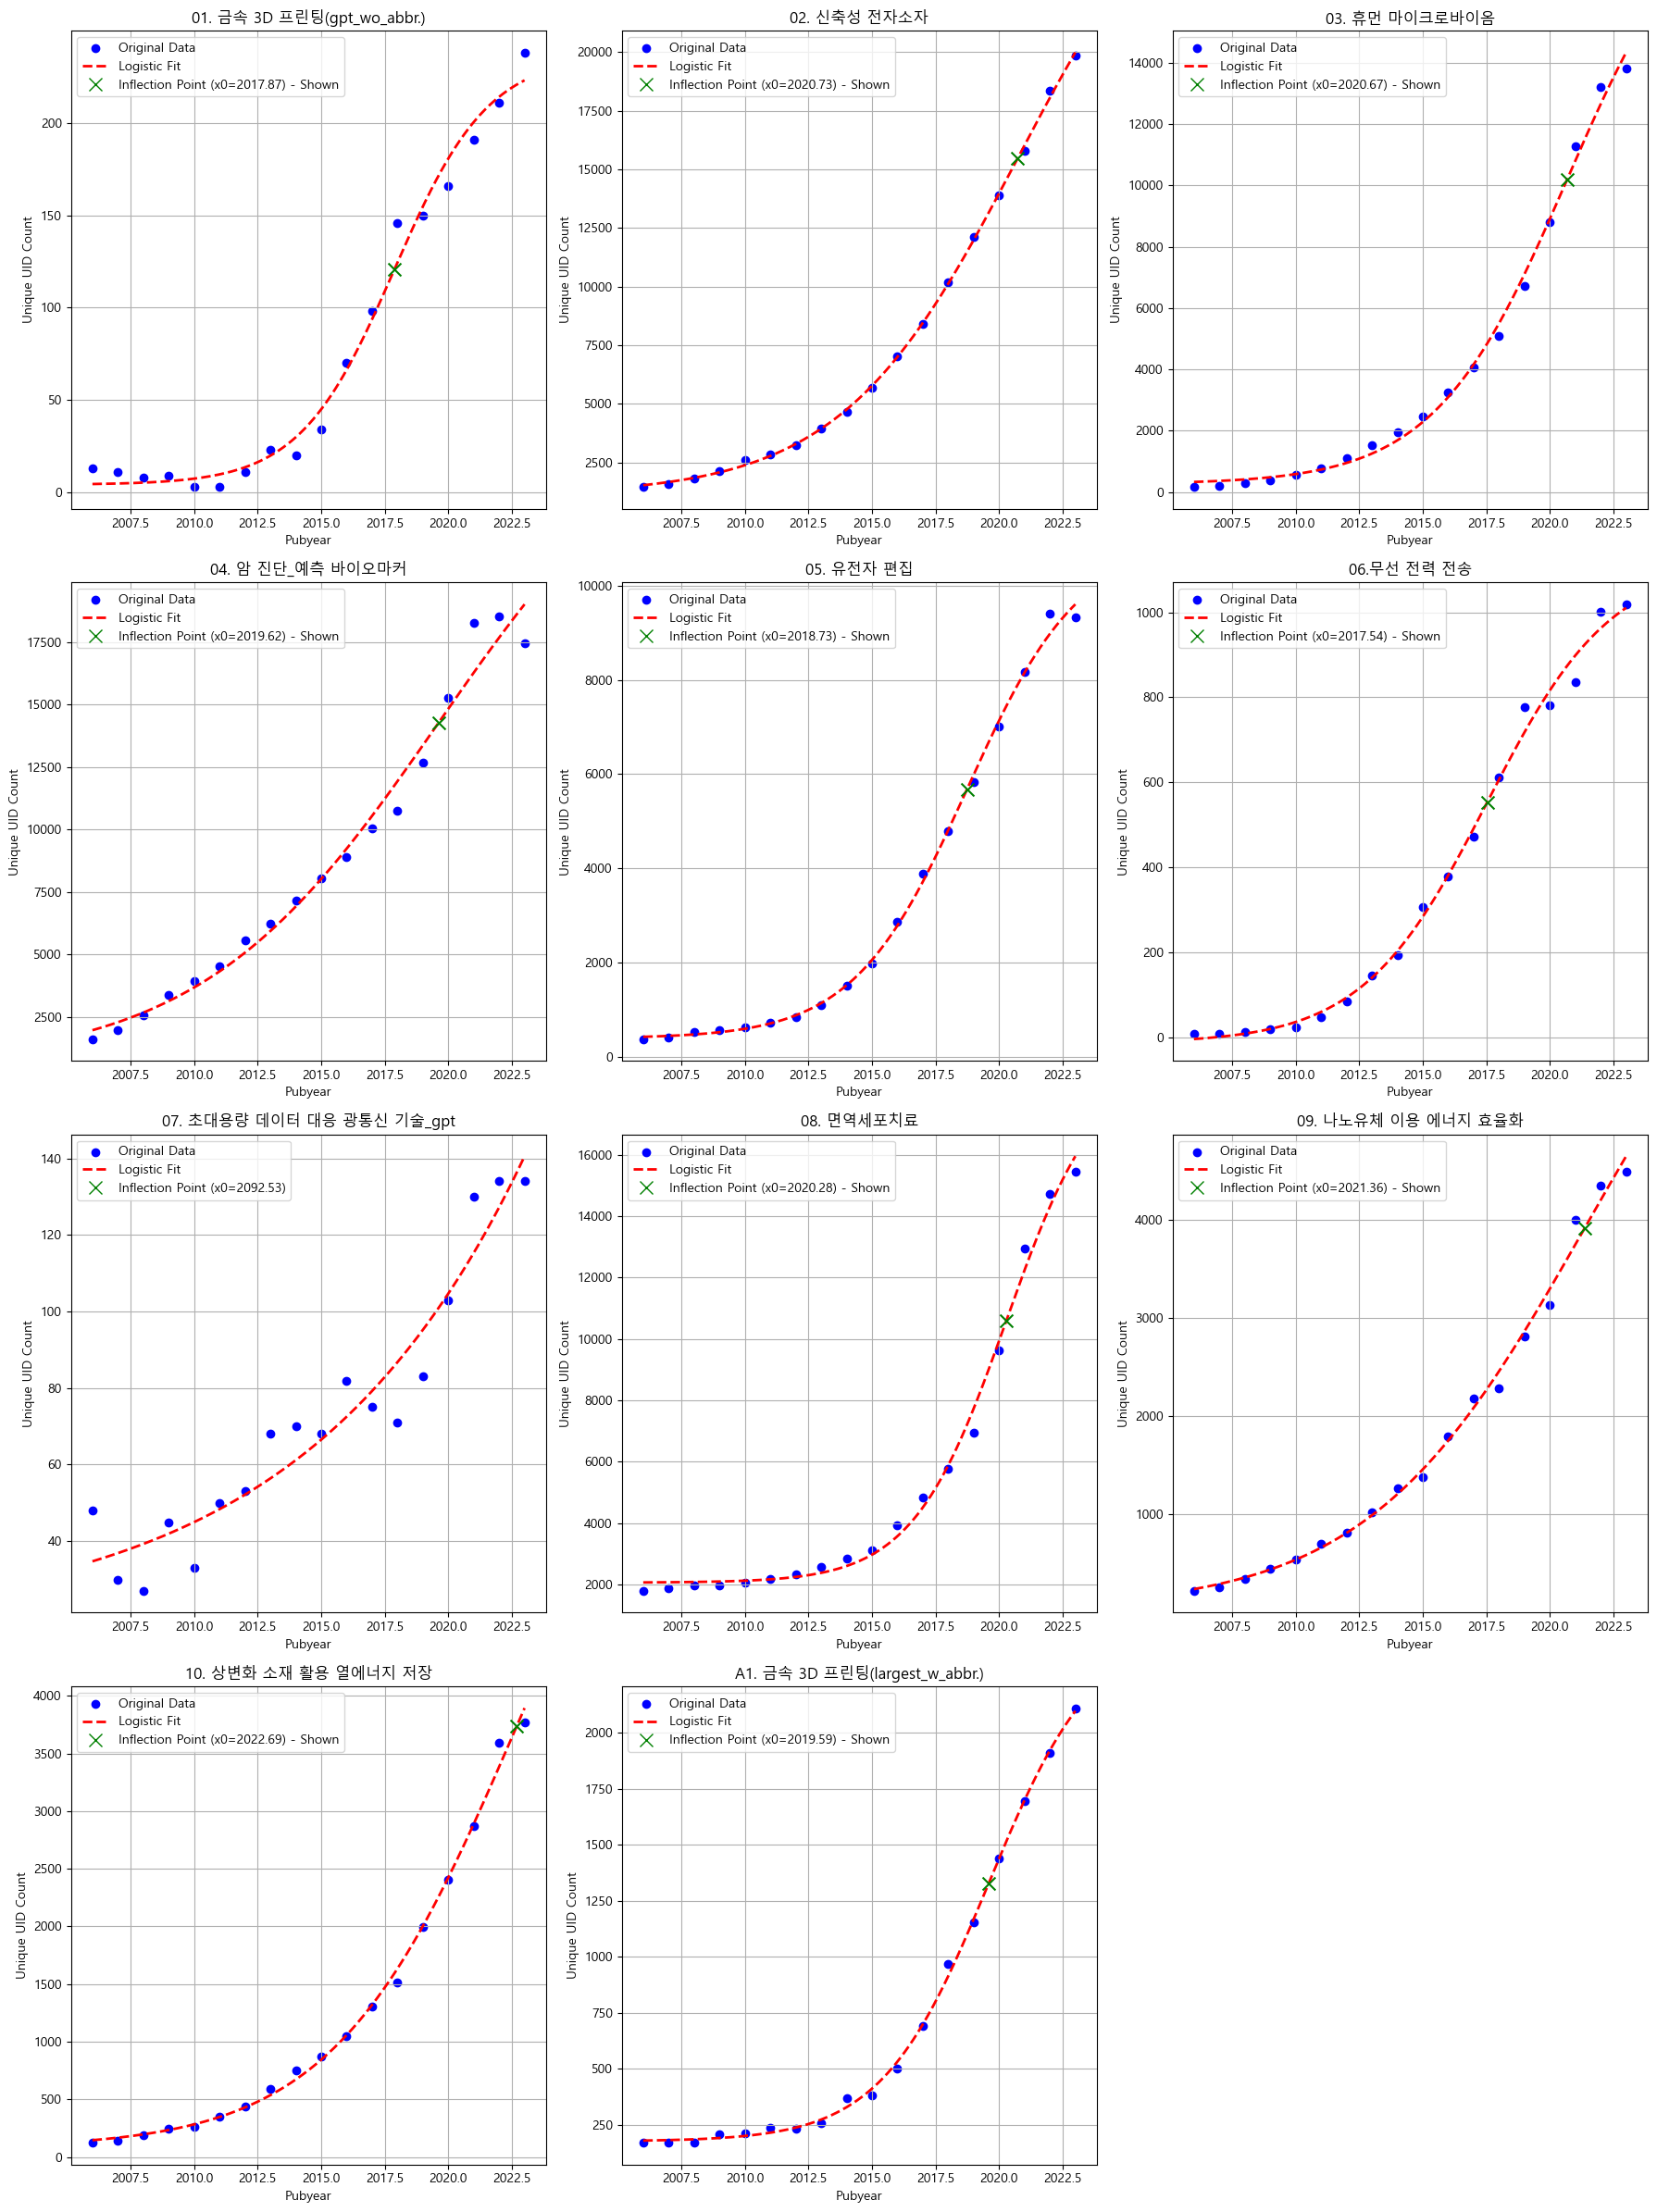

In [38]:
# Plotting the results
num_keys = len(results)
num_cols = 3
num_rows = (num_keys // num_cols) + (1 if num_keys % num_cols else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))
axes = axes.flatten()

x_fit = np.linspace(2006, 2023, 500)

for idx, (key, data) in enumerate(results.items()):
    ax = axes[idx]
    x_data = data['x_data']
    y_data = data['y_data']
    params = data['params']
    y_fit = logistic_function(x_fit, *params)
    
    # Calculate inflection point
    x0 = params[1]
    y0 = logistic_function(x0, *params)
    
    ax.scatter(x_data, y_data, color='blue', label='Original Data')
    ax.plot(x_fit, y_fit, 'r--', linewidth=2, label='Logistic Fit')
    
    inflection_point_label = f'Inflection Point (x0={x0:.2f})'
    if x0 >= min(x_data) and x0 <= max(x_data):
        ax.scatter(x0, y0, color='green', s=100, marker='x', zorder=5)
        inflection_point_label += ' - Shown'
    
    ax.set_xlabel('Pubyear')
    ax.set_ylabel('Unique UID Count')
    ax.set_title(key)
    handles, labels = ax.get_legend_handles_labels()
    handles.append(plt.Line2D([0], [0], color='green', marker='x', linestyle='None', markersize=10))
    labels.append(inflection_point_label)
    ax.legend(handles, labels)
    ax.grid(True)

# Hide any unused subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()